<a href="https://colab.research.google.com/github/El-Nico/tensorflow-notes/blob/main/regression_excersises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises
1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.


1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [76]:
#creating linear regression data with numpy
import numpy as np
import matplotlib.pyplot as plt

In [77]:
#create features
X=np.arange(1,6,0.5)
X

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])

In [78]:
#create labels
Y=np.arange(10,60,5)
Y

array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])

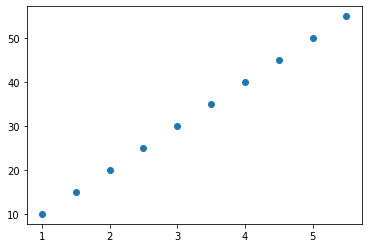

In [79]:
#visualize
plt.scatter(X, Y)

2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [80]:
#imports
import tensorflow as tf


In [81]:
#tensorize numpy array
X=tf.constant(X)
Y=tf.constant(Y)
X,Y

(<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>,
 <tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>)

In [82]:
#using the keras sequential api to make predictions

#create model usin the sequential api
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1, input_shape=[1]),
                             tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1),
                              tf.keras.layers.Dense(1)
])

#compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

#fit the model
model.fit(tf.expand_dims(X, axis=-1), Y, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 856ms/step - loss: 33.5067 - mae: 33.5067
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 33.2688 - mae: 33.2688
Epoch 3/30
1/1 [==============================] - 0s 18ms/step - loss: 33.0534 - mae: 33.0534
Epoch 4/30
1/1 [==============================] - 0s 18ms/step - loss: 32.8543 - mae: 32.8543
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 32.6663 - mae: 32.6663
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 32.4852 - mae: 32.4852
Epoch 7/30
1/1 [==============================] - 0s 9ms/step - loss: 32.3068 - mae: 32.3068
Epoch 8/30
1/1 [==============================] - 0s 9ms/step - loss: 32.1272 - mae: 32.1272
Epoch 9/30
1/1 [==============================] - 0s 10ms/step - loss: 31.9428 - mae: 31.9428
Epoch 10/30
1/1 [==============================] - 0s 18ms/step - loss: 31.7493 - mae: 31.7493
Epoch 11/30
1/1 [==============================] - 0s 10ms/ste

In [83]:
X

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5])>

In [84]:
lastval=X[-1].numpy()+0.5

In [85]:
stopval=lastval+(0.5*10)

In [86]:
#create test features and labels
X_test=tf.constant(np.arange(lastval, stopval, 0.5 ))
X_test

<tf.Tensor: shape=(10,), dtype=float64, numpy=array([ 6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5])>

In [87]:
Y

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55])>

In [88]:
Y_test=tf.cast(X_test*10, tf.int32)
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 60,  65,  70,  75,  80,  85,  90,  95, 100, 105], dtype=int32)>

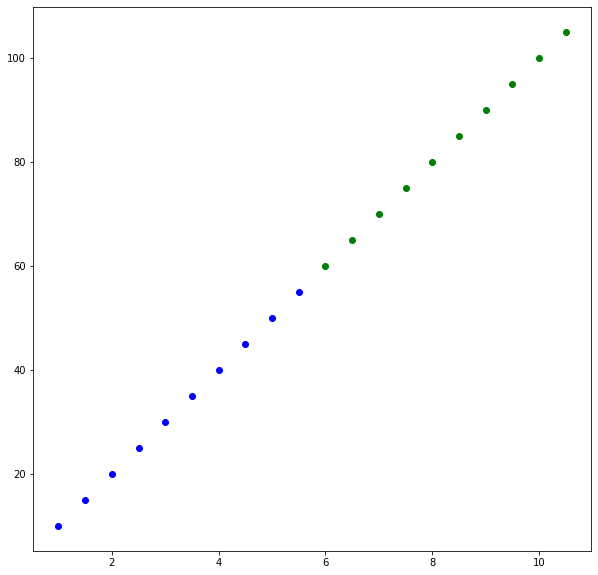

In [89]:
#visualize train and test data
plt.figure(figsize=(10,10))
#plot traing data in blue
plt.scatter(X, Y, c='b', label='Trainining data')
#plot test data in green
plt.scatter(X_test, Y_test, c='g', label="test data")

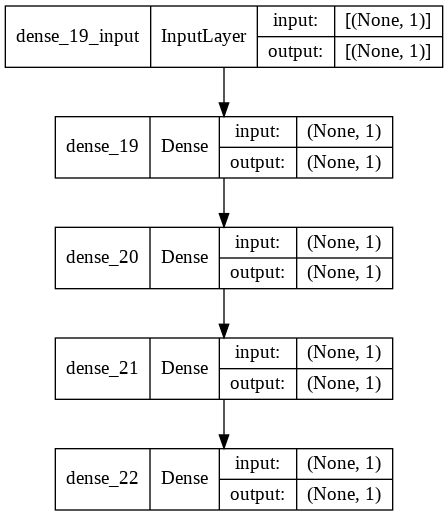

In [90]:
#visualizing model and predictions
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [91]:
#making predictions with the model
Y_preds= model.predict(X_test)

In [92]:
Y_preds

array([[ 62.314728],
       [ 67.30305 ],
       [ 72.29137 ],
       [ 77.27969 ],
       [ 82.26801 ],
       [ 87.256325],
       [ 92.24465 ],
       [ 97.23297 ],
       [102.22128 ],
       [107.2096  ]], dtype=float32)

In [93]:
#building a plotting function
def plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

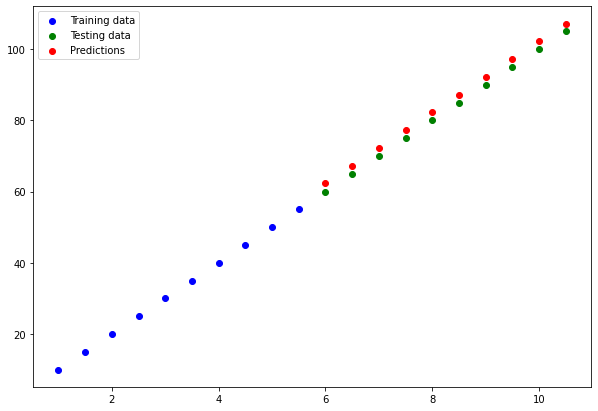

In [94]:
plot_predictions(train_data=X,
                     train_labels=Y,
                     test_data=X_test,
                     test_labels=Y_test,
                     predictions=Y_preds)

3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 

In [95]:
#importing the insurance dataset
import pandas as pd

In [96]:
#read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [97]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [98]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [99]:
#data normalization and standardization using make_column_transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [100]:
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

In [101]:
#creating features and labels
X=insurance.drop("charges", axis=1)
Y=insurance["charges"]

In [102]:
#train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [103]:
#fit column transformer on the training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['age', 'bmi', 'children']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['sex', 'smoker', 'region'])])

In [104]:
# Transform training and test data with normalization (MinMaxScalar)
X_train_normal= ct.transform(X_train)
X_test_normal= ct.transform(X_test)

In [105]:
#Non_normalized example
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [106]:
#normalized example
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [107]:
#viewing data shapes
X_train_normal.shape, X_train.shape

((1070, 11), (1070, 6))

In [108]:
len(X_train_normal)

1070

In [109]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [110]:
#ORIGINAL MODEL


# Set random seed
tf.random.set_seed(42)

# Build the model (3 layers, 100, 10, 1 units)
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mae'])

# Fit the model for 200 epochs (same as insurance_model_2)
insurance_model_3.fit(X_train_normal, Y_train, epochs=200)


Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13342.6475 - mae: 13342.6475
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 13189.5850 - mae: 13189.5850
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11925.96

In [111]:
#evaluating the model
insurance_model_3_loss, insurance_model_3_mae = insurance_model_3.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3171.5774 - mae: 3171.5774


In [112]:
#one of the main benefits of normalization is faster convergence time

 * Building a larger model with 4 dense layers.

In [113]:
insurance_model_4dense=tf.keras.Sequential([
        tf.keras.layers.Dense(1000),
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1), #output layer                                    
])

#compile the model
insurance_model_4dense.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit the model for 200 epochs
insurance_model_4dense.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 6ms/step - loss: 13297.4092 - mae: 13297.4092
Epoch 2/200
34/34 [==============================] - 0s 9ms/step - loss: 12533.7021 - mae: 12533.7021
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 9508.4912 - mae: 9508.4912
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 7857.6260 - mae: 7857.6260
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 7529.5029 - mae: 7529.5029
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 7176.0156 - mae: 7176.0156
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 6683.5479 - mae: 6683.5479
Epoch 8/200
34/34 [==============================] - 0s 8ms/step - loss: 5991.7471 - mae: 5991.7471
Epoch 9/200
34/34 [==============================] - 0s 8ms/step - loss: 5003.1641 - mae: 5003.1641
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 4041.6340 - mae: 4041.

In [115]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [116]:
#evaluate the 4 dense model
insurance_model_4dense_loss, insurance_model_4dense_mae= insurance_model_4dense.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3169.9792 - mae: 3169.9792


In [ ]:
#result==> model performs slightly better

 * Increasing the number of units in each layer by 1 order of magnitude


In [118]:
#build the model (3 layers, 10000, 100, 1)
insurance_model_increased_units=tf.keras.Sequential([
      tf.keras.layers.Dense(10000),
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(1)                                               
])

#compile the model
insurance_model_increased_units.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)


#fit the model on the training data
insurance_model_increased_units.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 2s 24ms/step - loss: 13032.2617 - mae: 13032.2617
Epoch 2/200
34/34 [==============================] - 1s 24ms/step - loss: 10138.6143 - mae: 10138.6143
Epoch 3/200
34/34 [==============================] - 1s 24ms/step - loss: 7799.5273 - mae: 7799.5273
Epoch 4/200
34/34 [==============================] - 1s 24ms/step - loss: 7326.6265 - mae: 7326.6265
Epoch 5/200
34/34 [==============================] - 1s 25ms/step - loss: 6676.0244 - mae: 6676.0244
Epoch 6/200
34/34 [==============================] - 1s 23ms/step - loss: 5733.3745 - mae: 5733.3745
Epoch 7/200
34/34 [==============================] - 1s 24ms/step - loss: 4493.2080 - mae: 4493.2080
Epoch 8/200
34/34 [==============================] - 1s 25ms/step - loss: 3756.2629 - mae: 3756.2629
Epoch 9/200
34/34 [==============================] - 1s 24ms/step - loss: 3656.5447 - mae: 3656.5447
Epoch 10/200
34/34 [==============================] - 1s 26ms/step - loss: 3650.0278 - 

In [119]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [120]:
#evaluate the more neurons model
insurance_model_increased_units_loss, insurance_model_increased_units_mae= insurance_model_increased_units.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3162.0945 - mae: 3162.0945


In [ ]:
#Result==>the increased units model experienced modestly more accuracy

 * increasing the adam learning rate by 10x

In [123]:
#replicate insurance model 3
insurance_model_adam10x= tf.keras.Sequential([
        tf.keras.layers.Dense(100),
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(1),
])

#compile model with adam 10 x optimizer
insurance_model_adam10x.compile(
    loss= tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)

#fit the model to the training data
insurance_model_adam10x.fit(X_train_normal, Y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 5ms/step - loss: 13214.1299 - mae: 13214.1299
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 11311.0137 - mae: 11311.0137
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 8095.2485 - mae: 8095.2485
Epoch 4/200
34/34 [==============================] - 0s 4ms/step - loss: 7583.3965 - mae: 7583.3965
Epoch 5/200
34/34 [==============================] - 0s 4ms/step - loss: 7083.3838 - mae: 7083.3838
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 6463.5938 - mae: 6463.5938
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 5505.5186 - mae: 5505.5186
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 4355.8721 - mae: 4355.8721
Epoch 9/200
34/34 [==============================] - 0s 5ms/step - loss: 3725.9761 - mae: 3725.9761
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 3672.4211 - mae: 3672.

In [124]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [125]:
#evaluate the faster learning rate model against the test data
insurance_model_adam10x_loss, insurance_model_adam10x_mae= insurance_model_adam10x.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3162.7273 - mae: 3162.7273


In [ ]:
#Result==> faster learning rate model performs slightly better

 * training the model for 300 epochs

In [126]:
#create the 300 epochs mode
insurance_model_300e=tf.keras.Sequential([
      tf.keras.layers.Dense(100),
      tf.keras.layers.Dense(10),
      tf.keras.layers.Dense(1),
])

#compile the model
insurance_model_300e.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['mae']
)

#fit the model on the training data for 300 epochs
insurance_model_300e.fit(X_train_normal, Y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 1s 4ms/step - loss: 13343.3164 - mae: 13343.3164
Epoch 2/300
34/34 [==============================] - 0s 4ms/step - loss: 13332.5879 - mae: 13332.5879
Epoch 3/300
34/34 [==============================] - 0s 4ms/step - loss: 13307.2656 - mae: 13307.2656
Epoch 4/300
34/34 [==============================] - 0s 4ms/step - loss: 13255.0293 - mae: 13255.0293
Epoch 5/300
34/34 [==============================] - 0s 4ms/step - loss: 13164.0684 - mae: 13164.0684
Epoch 6/300
34/34 [==============================] - 0s 4ms/step - loss: 13022.8252 - mae: 13022.8252
Epoch 7/300
34/34 [==============================] - 0s 4ms/step - loss: 12820.9688 - mae: 12820.9688
Epoch 8/300
34/34 [==============================] - 0s 4ms/step - loss: 12548.8330 - mae: 12548.8330
Epoch 9/300
34/34 [==============================] - 0s 4ms/step - loss: 12196.7725 - mae: 12196.7725
Epoch 10/300
34/34 [==============================] - 0s 4ms/step - loss: 11766.18

In [127]:
insurance_model_3_loss, insurance_model_3_mae

(3171.577392578125, 3171.577392578125)

In [128]:
#evaluate the 300 epochs model on the test data
insurance_model_300e_loss, insurance_model_300e_mae = insurance_model_300e.evaluate(X_test_normal, Y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3161.5085 - mae: 3161.5085


In [ ]:
#Result==> performs about as well as other previous experiments

4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.
